## Diabetes Prediction for Pima Indian

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


### Features from the data

* Pregnancies
* Glucose
* BloodPressure(mm Hg)
* SkinThickness(mm)
* Insulin(mu U/ml)
* BMI(weight(kg)/(height(m))^2)
* DiabetesPedigreeFunction
* Age
* Outcome: 0 or 1 

In [3]:
diabetes_data.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Load the function get_clf_eval(), precision_recall_curve_plot()**

In [4]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    
    # ROC-AUC 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('confusion matrix')
    print(confusion)
    # ROC-AUC print
    print('accuracy: {0:.4f}, presicion: {1:.4f}, recall: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [12]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):

    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # change threshold Scale=0.1 in X-axis
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x-axis, y-axis label, legend, and grid
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

**Split the dataset into the training set and test set**

In [13]:

X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify = y)
 

**Perfome training and prediction with Logistic Regression**

In [18]:
# Training the Logistic Regression model on the Training set
classifier = LogisticRegression(solver='liblinear')
classifier.fit(X_train, y_train)

# predict the test set result
pred = classifier.predict(X_test)
pred_proba = classifier.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)


confusion matrix
[[87 13]
 [22 32]]
accuracy: 0.7727, presicion: 0.7111, recall: 0.5926,    F1: 0.6465, AUC:0.8083


**Precision recall curve**

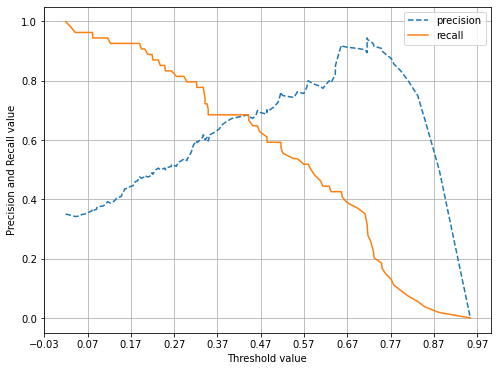

In [19]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

- threshold is around 0,4

In [20]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Glucose feature distribution**

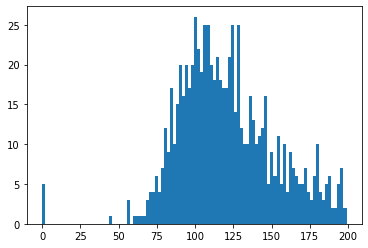

In [21]:
plt.hist(diabetes_data['Glucose'], bins=100)
plt.show()

### Feature Scaling

**Iterate by features to extract count for 0 value.**

In [23]:
# check 0 value
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

# totla data count
total_count = diabetes_data['Glucose'].count()

# iterate by features to extract count for 0 value.
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 count {1}, rate {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))


Glucose 0 count 5, rate 0.65 %
BloodPressure 0 count 35, rate 4.56 %
SkinThickness 0 count 227, rate 29.56 %
Insulin 0 count 374, rate 48.70 %
BMI 0 count 11, rate 1.43 %


**Replace 0 to mean**
- replace()

In [24]:
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, diabetes_data[zero_features].mean())

**Do Scailing with StandardScaler Class**

In [26]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# do Scailing with StandardScaler Class
scaler = StandardScaler( )
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify=y)

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba)

confusion matrix
[[90 10]
 [21 33]]
accuracy: 0.7987, presicion: 0.7674, recall: 0.6111,    F1: 0.6804, AUC:0.8433


**Check performance by changing threshold**

In [27]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # Evaluate with iteration for each thresholds. 
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('threshold:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

If threshold is lower, the recall is increasing!

In [29]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

threshold: 0.3
confusion matrix
[[65 35]
 [11 43]]
accuracy: 0.7013, presicion: 0.5513, recall: 0.7963,    F1: 0.6515, AUC:0.8433
threshold: 0.33
confusion matrix
[[71 29]
 [11 43]]
accuracy: 0.7403, presicion: 0.5972, recall: 0.7963,    F1: 0.6825, AUC:0.8433
threshold: 0.36
confusion matrix
[[76 24]
 [15 39]]
accuracy: 0.7468, presicion: 0.6190, recall: 0.7222,    F1: 0.6667, AUC:0.8433
threshold: 0.39
confusion matrix
[[78 22]
 [16 38]]
accuracy: 0.7532, presicion: 0.6333, recall: 0.7037,    F1: 0.6667, AUC:0.8433
threshold: 0.42
confusion matrix
[[84 16]
 [18 36]]
accuracy: 0.7792, presicion: 0.6923, recall: 0.6667,    F1: 0.6792, AUC:0.8433
threshold: 0.45
confusion matrix
[[85 15]
 [18 36]]
accuracy: 0.7857, presicion: 0.7059, recall: 0.6667,    F1: 0.6857, AUC:0.8433
threshold: 0.48
confusion matrix
[[88 12]
 [19 35]]
accuracy: 0.7987, presicion: 0.7447, recall: 0.6481,    F1: 0.6931, AUC:0.8433
threshold: 0.5
confusion matrix
[[90 10]
 [21 33]]
accuracy: 0.7987, presicion: 0.76

=> threshold : 0.48 seems to be suitable! 

In [30]:
# Create Binarizer by setting threshold =0.48
binarizer = Binarizer(threshold=0.48)

pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1)) 

get_clf_eval(y_test , pred_th_048, pred_proba[:, 1])

confusion matrix
[[88 12]
 [19 35]]
accuracy: 0.7987, presicion: 0.7447, recall: 0.6481,    F1: 0.6931, AUC:0.8433
